In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
os.chdir('C:\\Users\\Admin\\Downloads\\Bootcamp Assignement\\A1b')

In [5]:
ipl_bbb = pd.read_csv('IPL_ball_by_ball_updated till 2024.csv',low_memory=False)

In [6]:
ipl_salary = pd.read_excel('IPL SALARIES 2024.xlsx')

In [7]:
ipl_salary.head(2)

,Player,Salary,Rs,international,iconic
0,Abhishek Porel,20 lakh,20,0,NaN
1,Anrich Nortje,6.5 crore,650,1,NaN


In [8]:
grouped_data = ipl_bbb.groupby(['Season', 'Innings No', 'Striker','Bowler']).agg({'runs_scored': sum, 'wicket_confirmation':sum}).reset_index()

In [9]:
player_runs = grouped_data.groupby(['Season', 'Striker'])['runs_scored'].sum().reset_index()
player_wickets = grouped_data.groupby(['Season', 'Bowler'])['wicket_confirmation'].sum().reset_index()

In [13]:
player_runs[player_runs['Season']=='2024'].sort_values(by='runs_scored',ascending=False)

,Season,Striker,runs_scored
2549,2024,RD Gaikwad,509
2589,2024,V Kohli,500
2470,2024,B Sai Sudharsan,418
2502,2024,KL Rahul,406
2555,2024,RR Pant,398
...,...,...,...
2583,2024,TA Boult,0
2527,2024,Mukesh Kumar,0
2462,2024,Anmolpreet Singh,0
2560,2024,Ravi Bishnoi,0


In [14]:
top_run_getters = player_runs.groupby('Season').apply(lambda x: x.nlargest(3, 'runs_scored')).reset_index(drop=True)
bottom_wicket_takers = player_wickets.groupby('Season').apply(lambda x: x.nlargest(3, 'wicket_confirmation')).reset_index(drop=True)
print("Top Three Run Getters:")
print(top_run_getters)
print("Top Three Wicket Takers:")
print(bottom_wicket_takers)

Top Three Run Getters:
     Season          Striker  runs_scored
0   2007/08         SE Marsh          616
1   2007/08        G Gambhir          534
2   2007/08    ST Jayasuriya          514
3      2009        ML Hayden          572
4      2009     AC Gilchrist          495
5      2009   AB de Villiers          465
6   2009/10     SR Tendulkar          618
7   2009/10        JH Kallis          572
8   2009/10         SK Raina          528
9      2011         CH Gayle          608
10     2011          V Kohli          557
11     2011     SR Tendulkar          553
12     2012         CH Gayle          733
13     2012        G Gambhir          590
14     2012         S Dhawan          569
15     2013       MEK Hussey          733
16     2013         CH Gayle          720
17     2013          V Kohli          639
18     2014       RV Uthappa          660
19     2014         DR Smith          566
20     2014       GJ Maxwell          552
21     2015        DA Warner          562
22     2015

In [15]:
ipl_year_id = pd.DataFrame(columns=["id", "year"])
ipl_year_id["id"] = ipl_bbb["Match id"]
ipl_year_id["year"] = pd.to_datetime(ipl_bbb["Date"], dayfirst=True).dt.year

In [16]:
#create a copy of ipl_bbbc dataframe
ipl_bbbc= ipl_bbb.copy()

In [17]:
ipl_bbbc['year'] = pd.to_datetime(ipl_bbb["Date"], dayfirst=True).dt.year

In [18]:
ipl_bbbc[["Match id", "year", "runs_scored","wicket_confirmation","Bowler",'Striker']].head()

,Match id,year,runs_scored,wicket_confirmation,Bowler,Striker
0,335982,2008,0,0,P Kumar,SC Ganguly
1,335982,2008,0,0,P Kumar,BB McCullum
2,335982,2008,0,0,P Kumar,BB McCullum
3,335982,2008,0,0,P Kumar,BB McCullum
4,335982,2008,0,0,P Kumar,BB McCullum


In [19]:
import scipy.stats as st

def get_best_distribution(data):
    dist_names = ['alpha','beta','betaprime','burr12','crystalball',
                  'dgamma','dweibull','erlang','exponnorm','f','fatiguelife',
                  'gamma','gengamma','gumbel_l','johnsonsb','kappa4',
                  'lognorm','nct','norm','norminvgauss','powernorm','rice',
                  'recipinvgauss','t','trapz','truncnorm']
    dist_results = []
    params = {}
    for dist_name in dist_names:
        dist = getattr(st, dist_name)
        param = dist.fit(data)
        params[dist_name] = param
        # Applying the Kolmogorov-Smirnov test
        D, p = st.kstest(data, dist_name, args=param)
        print("p value for "+dist_name+" = "+str(p))
        dist_results.append((dist_name, p))
    # select the best fitted distribution
    best_dist, best_p = (max(dist_results, key=lambda item: item[1]))
    # store the name of the best fit and its p value
    print("\nBest fitting distribution: "+str(best_dist))
    print("Best p value: "+ str(best_p))
    print("Parameters for the best fit: "+ str(params[best_dist]))
    return best_dist, best_p, params[best_dist]

In [20]:
total_run_each_year = ipl_bbbc.groupby(["year", "Striker"])["runs_scored"].sum().reset_index()

In [21]:
total_run_each_year.sort_values(["year", "runs_scored"], ascending=False, inplace=True)
print(total_run_each_year)

      year          Striker  runs_scored
2549  2024       RD Gaikwad          509
2589  2024          V Kohli          500
2470  2024  B Sai Sudharsan          418
2502  2024         KL Rahul          406
2555  2024          RR Pant          398
...    ...              ...          ...
58    2008         L Balaji            0
66    2008   M Muralitharan            0
75    2008         MM Patel            0
107   2008      S Sreesanth            0
136   2008           U Kaul            0

[2598 rows x 3 columns]


In [22]:
list_top_batsman_last_three_year = {}
for i in total_run_each_year["year"].unique()[:3]:
    list_top_batsman_last_three_year[i] = total_run_each_year[total_run_each_year.year == i][:3]["Striker"].unique().tolist()

In [23]:
list_top_batsman_last_three_year

{2024: ['RD Gaikwad', 'V Kohli', 'B Sai Sudharsan'],
 2023: ['Shubman Gill', 'F du Plessis', 'DP Conway'],
 2022: ['JC Buttler', 'KL Rahul', 'Q de Kock']}

In [24]:
import warnings
warnings.filterwarnings('ignore')
runs = ipl_bbbc.groupby(['Striker','Match id'])[['runs_scored']].sum().reset_index()

for key in list_top_batsman_last_three_year:
    for Striker in list_top_batsman_last_three_year[key]:
        print("************************")
        print("year:", key, " Batsman:", Striker)
        get_best_distribution(runs[runs["Striker"] == Striker]["runs_scored"])
        print("\n\n")

************************
year: 2024  Batsman: RD Gaikwad
p value for alpha = 2.599259711013304e-20
p value for beta = 0.02041902689492492
p value for betaprime = 0.0195037635986679
p value for burr12 = 0.46882020698395865
p value for crystalball = 0.24953646987270617
p value for dgamma = 0.1570743843120962
p value for dweibull = 0.20046582403736823
p value for erlang = 1.893799588395604e-06
p value for exponnorm = 0.4644304230917985
p value for f = 1.3560920695663998e-07
p value for fatiguelife = 1.304427037367869e-14
p value for gamma = 0.005830868576003456
p value for gengamma = 0.015331622187827243
p value for gumbel_l = 0.05546236480086464
p value for johnsonsb = 4.646964117947127e-13
p value for kappa4 = 0.006363220770325362
p value for lognorm = 1.1719355665219537e-16
p value for nct = 0.5881570496217812
p value for norm = 0.2495365180930973
p value for norminvgauss = 0.5538573365184996
p value for powernorm = 0.1788753268739085
p value for rice = 0.18287532184336575
p value for 

p value for crystalball = 0.004608459861307201
p value for dgamma = 0.00604199317470544
p value for dweibull = 0.0028430680547548715
p value for erlang = 0.0018449508774974754
p value for exponnorm = 0.7137955109895673
p value for f = 3.9553917967759444e-17
p value for fatiguelife = 0.3817917882201278
p value for gamma = 0.0007081454329525005
p value for gengamma = 0.3058332808341898
p value for gumbel_l = 0.00010416429669054019
p value for johnsonsb = 0.5217216451704005
p value for kappa4 = 1.0421737381705364e-12
p value for lognorm = 5.0571684202935185e-28
p value for nct = 0.45209196275779084
p value for norm = 0.004608461486487414
p value for norminvgauss = 0.4852525149516915
p value for powernorm = 0.004689395332742374
p value for rice = 0.004972139278293097
p value for recipinvgauss = 0.2745923469661907
p value for t = 0.007226707680555
p value for trapz = 8.531784262849386e-37
p value for truncnorm = 0.038943153796554775

Best fitting distribution: exponnorm
Best p value: 0.7137

In [25]:
total_wicket_each_year = ipl_bbbc.groupby(["year", "Bowler"])["wicket_confirmation"].sum().reset_index()

In [26]:
total_wicket_each_year.sort_values(["year", "wicket_confirmation"], ascending=False, inplace=True)
print(total_wicket_each_year)

      year             Bowler  wicket_confirmation
1836  2024           HV Patel                   19
1875  2024       Mukesh Kumar                   15
1822  2024     Arshdeep Singh                   14
1842  2024          JJ Bumrah                   14
1876  2024  Mustafizur Rahman                   14
...    ...                ...                  ...
16    2008           CL White                    0
41    2008             K Goel                    0
43    2008          LPC Silva                    0
60    2008       Pankaj Singh                    0
90    2008        VS Yeligati                    0

[1929 rows x 3 columns]


In [27]:
list_top_bowler_last_three_year = {}
for i in total_wicket_each_year["year"].unique()[:3]:
    list_top_bowler_last_three_year[i] = total_wicket_each_year[total_wicket_each_year.year == i][:3]["Bowler"].unique().tolist()
list_top_bowler_last_three_year

{2024: ['HV Patel', 'Mukesh Kumar', 'Arshdeep Singh'],
 2023: ['MM Sharma', 'Mohammed Shami', 'Rashid Khan'],
 2022: ['YS Chahal', 'PWH de Silva', 'K Rabada']}

In [28]:
import warnings
warnings.filterwarnings('ignore')
wickets = ipl_bbbc.groupby(['Bowler','Match id'])[['wicket_confirmation']].sum().reset_index()

for key in list_top_bowler_last_three_year:
    for bowler in list_top_bowler_last_three_year[key]:
        print("************************")
        print("year:", key, " Bowler:", bowler)
        get_best_distribution(wickets[wickets["Bowler"] == bowler]["wicket_confirmation"])
        print("\n\n")

************************
year: 2024  Bowler: HV Patel
p value for alpha = 0.0002993252328930706
p value for beta = 2.777571908776589e-19
p value for betaprime = 1.7052883875145053e-30
p value for burr12 = 5.427998338605459e-15
p value for crystalball = 1.1109118198587684e-05
p value for dgamma = 4.375428528574276e-05
p value for dweibull = 1.8553295107771936e-05
p value for erlang = 5.473635282991912e-24
p value for exponnorm = 0.0002813279943461815
p value for f = 1.9012983291282487e-09
p value for fatiguelife = 1.9734428958773156e-05
p value for gamma = 1.470787431589663e-16
p value for gengamma = 1.4345058849022962e-16
p value for gumbel_l = 4.541523588271283e-05
p value for johnsonsb = 2.827201329331457e-51
p value for kappa4 = 9.177530010006471e-23
p value for lognorm = 5.2162358572043325e-22
p value for nct = 0.0001960277304576293
p value for norm = 1.1109124960635979e-05
p value for norminvgauss = 3.811196478020768e-05
p value for powernorm = 3.2186417463058256e-05
p value for r

p value for beta = 1.0295677049868252e-44
p value for betaprime = 6.005755537239427e-40
p value for burr12 = 1.7979353447013811e-12
p value for crystalball = 5.1232708024114544e-08
p value for dgamma = 4.012289620255995e-08
p value for dweibull = 1.3446088982977968e-07
p value for erlang = 2.6044501249608127e-33
p value for exponnorm = 9.70188325365383e-06
p value for f = 4.3760412135414686e-11
p value for fatiguelife = 1.0610357499785987e-07
p value for gamma = 3.2021687139045712e-55
p value for gengamma = 4.0264602677437785e-26
p value for gumbel_l = 8.01003405037582e-08
p value for johnsonsb = 9.127045203599366e-44
p value for kappa4 = 5.8742872003226356e-27
p value for lognorm = 1.2869567438882943e-32
p value for nct = 5.296213377700368e-06
p value for norm = 5.1235707238843755e-08
p value for norminvgauss = 3.3808295582037935e-07
p value for powernorm = 1.021178511514112e-06
p value for rice = 1.0373024397997343e-06
p value for recipinvgauss = 1.53711078374615e-21
p value for t = 

**Relationship between the performance of a player and the salary he gets**

In [32]:
R2024 =total_run_each_year[total_run_each_year['year']==2024]

In [33]:
pip install fuzzywuzzy

  Obtaining dependency information for fuzzywuzzy from https://files.pythonhosted.org/packages/43/ff/74f23998ad2f93b945c0309f825be92e04e0348e062026998b5eefef4c33/fuzzywuzzy-0.18.0-py2.py3-none-any.whl.metadata
Note: you may need to restart the kernel to use updated packages.


In [34]:
from fuzzywuzzy import process

# Convert to DataFrame
df_salary = ipl_salary.copy()
df_runs = R2024.copy()

# Function to match names
def match_names(name, names_list):
    match, score = process.extractOne(name, names_list)
    return match if score >= 80 else None  # Use a threshold score of 80

# Create a new column in df_salary with matched names from df_runs
df_salary['Matched_Player'] = df_salary['Player'].apply(lambda x: match_names(x, df_runs['Striker'].tolist()))

# Merge the DataFrames on the matched names
df_merged = pd.merge(df_salary, df_runs, left_on='Matched_Player', right_on='Striker')

In [35]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Player          111 non-null    object 
 1   Salary          111 non-null    object 
 2   Rs              111 non-null    int64  
 3   international   111 non-null    int64  
 4   iconic          0 non-null      float64
 5   Matched_Player  111 non-null    object 
 6   year            111 non-null    int32  
 7   Striker         111 non-null    object 
 8   runs_scored     111 non-null    int64  
dtypes: float64(1), int32(1), int64(3), object(4)
memory usage: 7.5+ KB


In [36]:
# Calculate the correlation
correlation = df_merged['Rs'].corr(df_merged['runs_scored'])

print("Correlation between Salary and Runs:", correlation)

Correlation between Salary and Runs: 0.30612483765821674


### Fit the distribution for DA Warner

In [42]:
import warnings
warnings.filterwarnings('ignore')

# Filter the dataset for the player 'DA Warner'
runs_daw = runs[runs["Striker"] == 'DA Warner']

# Ensure that there is data available for 'DA Warner'
if not runs_daw.empty:
    print("************************")
    print("Fitting distribution for player: DA Warner")
    get_best_distribution(runs_daw["runs_scored"])
    print("\n\n")
else:
    print("No data available for player: DA Warner")


************************
Fitting distribution for player: DA
p value for alpha = 1.0585629720560084e-52
p value for beta = 3.5745573324904945e-08
p value for betaprime = 6.456048231755493e-05
p value for burr12 = 0.0053367737997585245
p value for crystalball = 0.011506079014413343
p value for dgamma = 0.0034368260383678033
p value for dweibull = 0.011575028320705543
p value for erlang = 1.3361116985872245e-07
p value for exponnorm = 0.0047146127753554595
p value for f = 9.652822993737924e-25
p value for fatiguelife = 0.0007338149332191667
p value for gamma = 7.42402039756757e-06
p value for gengamma = 0.000137571361634721
p value for gumbel_l = 2.2859043177733283e-05
p value for johnsonsb = 0.035283250510082076
p value for kappa4 = 2.2177511140768323e-16
p value for lognorm = 4.90625127843688e-49
p value for nct = 0.0035569577412994857
p value for norm = 0.011506078010792661
p value for norminvgauss = 0.002175511276856443
p value for powernorm = 0.002631374948064467
p value for rice = 

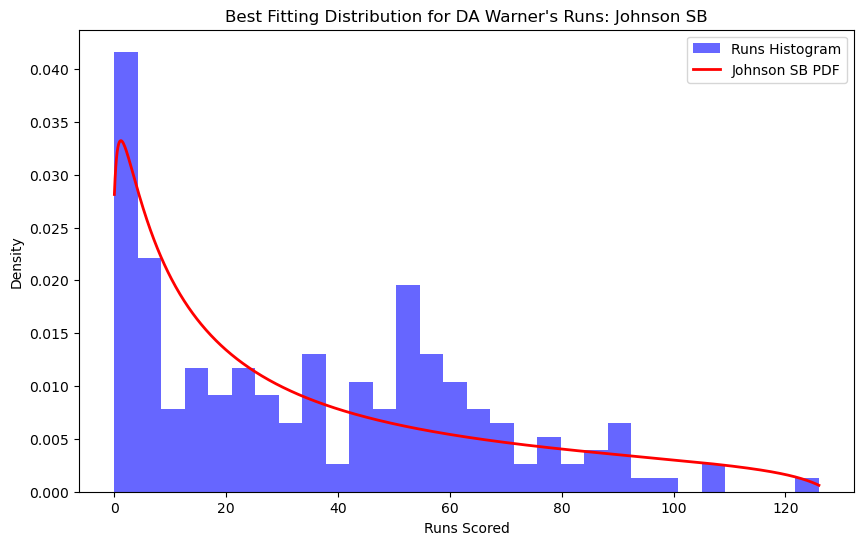

In [46]:
from scipy.stats import johnsonsb

# Data for the player 'DA Warner'
data = runs_daw["runs_scored"]

# Best fitting distribution parameters for Johnson SB
params = (0.8421115414450187, 0.5881937839851221, -0.6717865945304258, 128.9227493742876)

# Create a range of values to plot the PDF (Probability Density Function)
x = np.linspace(data.min(), data.max(), 1000)
pdf_fitted = johnsonsb.pdf(x, *params)

# Plot the histogram and PDF
plt.figure(figsize=(10, 6))
plt.hist(data, bins=30, density=True, alpha=0.6, color='b', label='Runs Histogram')
plt.plot(x, pdf_fitted, 'r-', lw=2, label='Johnson SB PDF')
plt.xlabel('Runs Scored')
plt.ylabel('Density')
plt.title('Best Fitting Distribution for DA Warner\'s Runs: Johnson SB')
plt.legend(loc='upper right')
plt.show()


### Top 10 batsmen and bowlers in the last 3 years

In [74]:
# Get top 10 batsmen and bowlers in the last 3 years
top_batsmen = player_runs.groupby('Striker')['runs_scored'].sum().nlargest(10).index
top_bowlers = player_wickets.groupby('Bowler')['wicket_confirmation'].sum().nlargest(10).index
print(top_batsmen)
print(top_bowlers)

Index(['V Kohli', 'S Dhawan', 'DA Warner', 'RG Sharma', 'SK Raina', 'MS Dhoni',
       'AB de Villiers', 'CH Gayle', 'RV Uthappa', 'KD Karthik'],
      dtype='object', name='Striker')
Index(['YS Chahal', 'DJ Bravo', 'SP Narine', 'PP Chawla', 'R Ashwin',
       'B Kumar', 'SL Malinga', 'A Mishra', 'JJ Bumrah', 'RA Jadeja'],
      dtype='object', name='Bowler')


In [62]:
pip install thefuzz


  Obtaining dependency information for thefuzz from https://files.pythonhosted.org/packages/82/4f/1695e70ceb3604f19eda9908e289c687ea81c4fecef4d90a9d1d0f2f7ae9/thefuzz-0.22.1-py3-none-any.whl.metadata
  Obtaining dependency information for rapidfuzz<4.0.0,>=3.0.0 from https://files.pythonhosted.org/packages/04/10/2c0ef45d4ace8dde87cfb91e48fb5c9976f8e01a57eb3230d90b82801dc5/rapidfuzz-3.9.3-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   - -------------------------------------- 0.1/1.7 MB 648.1 kB/s eta 0:00:03
   -- ------------------------------------- 0.1/1.7 MB 901.1 kB/s eta 0:00:02
   ------ --------------------------------- 0.3/1.7 MB 1.4 MB/s eta 0:00:01
   --------- ------------------------------ 0.4/1.7 MB 1.7 MB/s eta 0:00:01
   ---------------- ----------------------- 0.7/1.7 MB 2.4

In [70]:
# Function to match names using fuzzy matching
from thefuzz import process
def match_names(name, names_list):
    match, score = process.extractOne(name, names_list)
    return match if score > 80 else None

In [73]:
# Apply fuzzy matching to get exact names for salaries
matched_batsmen = [match_names(player, ipl_salary['Player'].tolist()) for player in top_batsmen]
matched_bowlers = [match_names(player, ipl_salary['Player'].tolist()) for player in top_bowlers]
print(matched_batsmen)

['Virat Kohli', 'Rishi Dhawan', 'David Warner', 'Sandeep Sharma', None, 'MS Dhoni', None, None, None, None]


In [72]:
# Filter salaries for the matched players
top_batsmen_salaries = ipl_salary[ipl_salary['Player'].isin(matched_batsmen)]
top_bowlers_salaries = ipl_salary[ipl_salary['Player'].isin(matched_bowlers)]

# Print the matched salaries for verification
print(top_batsmen_salaries)
print(top_bowlers_salaries)

             Player      Salary    Rs  international  iconic
3      David Warner  6.25 crore   625              1     NaN
24         MS Dhoni    12 crore  1200              0     NaN
107    Rishi Dhawan     55 lakh    55              0     NaN
124  Sandeep Sharma     50 lakh    50              0     NaN
143     Virat Kohli    15 crore  1500              0     NaN
               Player     Salary    Rs  international  iconic
9        Mukesh Kumar  5.5 crore   550              0     NaN
29    Ravindra Jadeja   16 crore  1600              0     NaN
61        Amit Mishra    50 lakh    50              0     NaN
85     Jasprit Bumrah   12 crore  1200              0     NaN
122         R. Ashwin    5 crore   500              0     NaN
129  Yuzvendra Chahal  6.5 crore   650              0     NaN


### T-test - Compare the salaries of the top 10 batsmen and top 10 bowlers

In [75]:
# Perform t-test
t_stat, p_value = ttest_ind(top_batsmen_salaries['Rs'], top_bowlers_salaries['Rs'])

print(f"T-statistic: {t_stat}, P-value: {p_value}")

if p_value < 0.05:
    print("There is a significant difference between the salaries of the top 10 batsmen and the top 10 bowlers.")
else:
    print("There is no significant difference between the salaries of the top 10 batsmen and the top 10 bowlers.")

T-statistic: -0.19847158812018, P-value: 0.8470869781735805
There is no significant difference between the salaries of the top 10 batsmen and the top 10 bowlers.
